# S-curve

## importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

## placing values

In [2]:
planned_duration =[2,3,4,5,6,3]
TPV = [1,1,1,1,7,1]
TEV = [2,2,2,2,7,1]
TAC = [3,2,2,2,7,1]

In [3]:

def commulation(lista):
    sum1 = 0
    listb= []
    for i in lista:
        sum1+=i
        listb.append(sum1)
    
    return listb
TAC = commulation(TAC)
TPV = commulation(TPV)
TEV = commulation(TEV)
planned_duration = commulation(planned_duration)

In [4]:
planned_duration

[2, 5, 9, 14, 20, 23]

## smoothing graph points

In [5]:

def multiple_points(lista):
    listb = []
    for i in range(int(min(lista)),int(max(lista))*10):
        listb.append(i/10)
    return listb
TAC_points = multiple_points(TAC)
TPV_points = multiple_points(TPV)
TEV_points = multiple_points(TEV)
planned_duration_points = multiple_points(planned_duration)

## plotting  polynomial curve

In [6]:
model_TAC = np.poly1d(np.polyfit(TAC,planned_duration,6))
model_TPV = np.poly1d(np.polyfit(TPV,planned_duration,3))
model_TEV = np.poly1d(np.polyfit(TEV,planned_duration,5))


C:\Users\mahmo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


using polynomial way

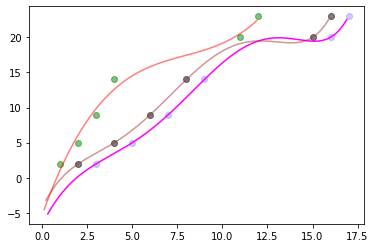

In [8]:
plt.scatter(TAC,planned_duration,color = 'blue',alpha = 0.2)
plt.plot(TAC_points,model_TAC(TAC_points),color = 'magenta')
plt.scatter(TEV,planned_duration,color = 'black',alpha=0.5)
plt.plot(TEV_points,model_TEV(TEV_points),color = 'brown',alpha=0.5)
plt.scatter(TPV,planned_duration,color = 'green',alpha=0.5)
plt.plot(TPV_points,model_TPV(TPV_points),color = 'red',alpha=0.5)



plt.show()

## Sigmoid best fit 

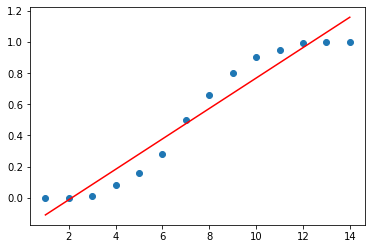

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
b = [0,0,0.01,0.08,0.16,00.28,0.5,0.66,0.8,0.9,0.95,0.99,1,1]
new_a = a[2:-2]
new_b = np.array(b[2:-2]) # Getting rid of 0 and 1 values
new_b = np.log((1 / new_b) - 1)
data = pd.DataFrame({'x': a, 'y':b})

LM = LinearRegression()
LM.fit(data[["x"]],data[["y"]])

plt.scatter(a,b)
plt.plot([1,14], LM.predict([[1],[14]]), color = "red")
plt.show() 



In [10]:
model = LinearRegression()
model.fit(new_a.reshape(-1, 1), new_b.reshape(-1, 1))
#taking beta and alpha from linear to plot values then 
alpha = model.coef_[0, 0]
beta = model.predict([[0]])[0, 0]

In [11]:
alpha

-0.8930453624312925

In [12]:
beta

6.483218676812772

plotting test sigmoid function

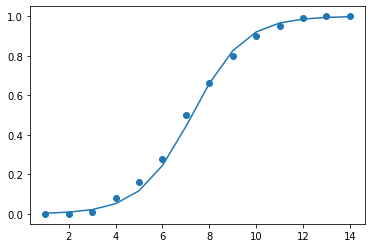

In [13]:
predicted = 1 / (1 + np.exp(alpha * a + beta))
plt.figure()
plt.scatter(a, b)
plt.plot(a, predicted)
plt.show()

### Making our own curve

## Normaliizing values

In [38]:
TEV = np.array(TEV)
TPV = np.array(TPV)
TAC = np.array(TAC)
planned_duration = np.array(planned_duration)

In [39]:
TEV = TEV.reshape(-1,1)
TPV = TPV.reshape(-1,1)
TAC = TAC.reshape(-1,1)
planned_duration = planned_duration.reshape(-1,1)

In [40]:
TPV

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [11],
       [12]])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
TEV_N = scaler.fit_transform(TEV)

In [41]:
TEV_N = TEV_N.reshape(1,-1)

In [42]:
TEV_N

array([[0.        , 0.14285714, 0.28571429, 0.42857143, 0.92857143,
        1.        ]])

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#New TEV X1
#New TPV X2
#New TAC X3
#planned_duration Y


data = pd.DataFrame({'x': planned_duration[:,0], 'y':TEV_N[0,:]})

#new_x = planned_duration[1:-1]
#new_y = np.array(TEV_N[1:-1]) # Getting rid of 0 and 1 values
#new_y = np.log((1 / new_y) - 1)




In [24]:
data.head()

,x,y
0,2,0.000000
1,5,0.142857
2,9,0.285714
3,14,0.428571
4,20,0.928571


In [25]:
new_y

array([], shape=(0, 6), dtype=float64)

In [274]:
TEV_N

array([[0.        , 0.14285714, 0.28571429, 0.42857143, 0.92857143,
        1.        ]])

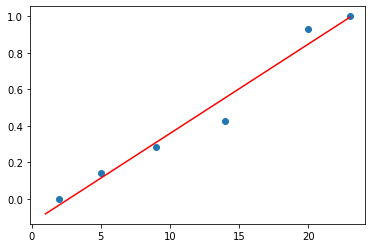

In [26]:
LM = LinearRegression()
LM.fit(data[["x"]],data[["y"]])

plt.scatter(planned_duration,TEV_N)
plt.plot([1,23], LM.predict([[1],[23]]), color = "red")
plt.show() 

In [284]:
new_y

array([], shape=(0, 6), dtype=float64)

In [30]:
model = LinearRegression()
model.fit(planned_duration.reshape(-1, 1), TEV_N.reshape(-1, 1))
#taking beta and alpha from linear to plot values then 
alpha = model.coef_[0, 0]
beta = model.predict([[0]])[0, 0]

In [36]:
alpha

0.04891192421226059

In [37]:
beta

-0.1308093636301229

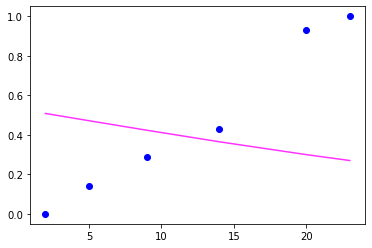

In [35]:

#b= np.array(b)
#b.reshape(-1,1)
#new_y = scaler.inverse_transform(b.reshape(-1,1))
predicted = 1 / (1 + np.exp(alpha * planned_duration + beta))
#new_predicted = scaler.inverse_transform(predicted.reshape(-1,1))
plt.figure()
plt.scatter(planned_duration,TEV_N,color = "blue")
plt.plot(planned_duration,predicted,color  = "magenta",alpha=0.8)
plt.show()

## -------

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

a = np.array(planned_duration)
b = TEV_N
new_a = a[2:-2]
new_b = np.array(b[2:-2]) # Getting rid of 0 and 1 values
new_b = np.log((1 / new_b) - 1)
data = pd.DataFrame({'x': a, 'y':b})

LM = LinearRegression()
LM.fit(data[["x"]],data[["y"]])

plt.scatter(a,b)
plt.plot([1,14], LM.predict([[1],[14]]), color = "red")
plt.show() 


ValueError: If using all scalar values, you must pass an index